<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run). 

## Case Study: Fashion Product Catalogue Analysis

This notebook demonstrates how to use VLM Run to analyze fashion product images and extract structured information including:
- Detailed product descriptions
- Product categories
- Target gender
- Seasonal classification

We'll use a sample dataset from the Fashion Product Images dataset to showcase VLM Run's retail product analysis capabilities.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

In [5]:
! pip install datasets --quiet

In [2]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

Let's initialize the VLM Run Client

In [3]:
from vlmrun.client import VLMRun

vlm_client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

### Load the dataset

Let's load the first 1% of the fashion dataset, and visualize the dataset.

In [19]:
from datasets import load_dataset


print(f"Loading fashion dataset...")
ds = load_dataset("ashraq/fashion-product-images-small", split=f"train[:10]")
print(f"Loaded {len(ds)} images successfully")
ds

Loading fashion dataset...
Loaded 10 images successfully


Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 10
})

Let's define an utility function for visualization

In [33]:
import pandas as pd

# Convert the dataset to a pandas dataframe
ds = ds.select_columns(["image", "productDisplayName", "gender", "masterCategory", "season"])
# Decode the image column and convert to PIL image
df = pd.DataFrame([{**row} for row in ds])
df

,image,productDisplayName,gender,masterCategory,season
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter


### Image -> JSON with VLM Run


Now, let's call the VLM Run API to get the predictions for the dataframe using the `vlm_client.image.generate` method. In this example, we'll use the `retail.product-catalog` domain to get the predictions.

In [38]:
# Define a function to get predictions for an image from the VLM Run API
def get_predictions(image):
    """Generate predictions for an image using the VLM Run API."""
    try:
        response = vlm_client.image.generate(
            images=[image],
            domain="retail.product-catalog"
        )
        return response.response
    except Exception as e:
        print(f"Error getting predictions for image: {e}")
        return None

# Apply the get_predictions function to the dataframe
df_response = df.assign(
    response=df["image"].apply(lambda image: get_predictions(image))
)
df_response

,image,productDisplayName,gender,masterCategory,season,response
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall,description='A young man wearing a checkered l...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer,description='A pair of blue jeans' category='c...
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter,description='A stylish silver wristwatch with ...
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall,description='Black athletic jogging pants with...
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer,"description=""Men's grey short-sleeve polo shir..."
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer,"description=""Men's Grey T-shirt with print des..."
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer,description='Green long-sleeve shirt' category...
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer,"description=""Stylish maroon women's short slee..."
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer,description='Puma black socks with white strip...
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter,description='Black wristwatch with a leather s...


In [61]:
# Let's explode the response column into a dataframe and display the predictions dataframe
pd.set_option("display.max_colwidth", None)
df_response_json = df_response["response"].apply(lambda x: x.model_dump() if x is not None else None)
df_response_json = pd.concat([df_response[["image"]], pd.json_normalize(df_response_json)], axis=1)
df_response_json


,image,description,category,season,gender
0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x1479A4E80>,A young man wearing a checkered long-sleeve shirt. The shirt features a blend of blue and white colors.,apparel,Season.spring,Gender.men
1,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x1479A75B0>,A pair of blue jeans,clothing,Season.fall,Gender.men
2,<PIL.Image.Image image mode=L size=60x80 at 0x1479BA080>,"A stylish silver wristwatch with a minimalist design, featuring a round dial and a silver bracelet strap.",accessories,Season.fall,Gender.women
3,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x1479A5300>,"Black athletic jogging pants with a logo on the left thigh, worn by a person in a red shirt.",pants,Season.fall,Gender.men
4,<PIL.Image.Image image mode=RGB size=60x80 at 0x1479B9C00>,Men's grey short-sleeve polo shirt,shirt,Season.summer,Gender.men
5,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x1479A5AB0>,Men's Grey T-shirt with print design,T-shirt,Season.summer,Gender.men
6,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x1479A7010>,Green long-sleeve shirt,Shirts,Season.fall,Gender.men
7,<PIL.Image.Image image mode=RGB size=60x80 at 0x150C78340>,Stylish maroon women's short sleeve blouse,topwear,Season.spring,Gender.women
8,<PIL.Image.Image image mode=RGB size=60x80 at 0x150C78640>,Puma black socks with white stripes,socks,Season.fall,Gender.men
9,<PIL.Image.Image image mode=RGB size=60x80 at 0x150C78880>,Black wristwatch with a leather strap and minimalist design.,watches,Season.fall,Gender.men


Now, let's define a few utilities for rendering the dataframe with images / tags.

In [59]:
from IPython.display import HTML, display
from vlmrun.common.image import encode_image

style = """
<style>
    .tag {
        padding: 4px 8px;
        border-radius: 4px;
        font-size: 12px;
        background: #f0f0f0;
        color: #666;
        font-weight: 300;
    }
</style>
"""

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='100'>",
    "category": lambda x: f"<span class='tag'>{x}</span>",
    "season": lambda x: f"<span class='tag'>{x}</span>",
    "gender": lambda x: f"<span class='tag'>{x}</span>",
}

Display the dataframe with images and VLM Run predictions.

,image,description,category,season,gender
0,,A young man wearing a checkered long-sleeve shirt. The shirt features a blend of blue and white colors.,apparel,Season.spring,Gender.men
1,,A pair of blue jeans,clothing,Season.fall,Gender.men
2,,"A stylish silver wristwatch with a minimalist design, featuring a round dial and a silver bracelet strap.",accessories,Season.fall,Gender.women
3,,"Black athletic jogging pants with a logo on the left thigh, worn by a person in a red shirt.",pants,Season.fall,Gender.men
4,,Men's grey short-sleeve polo shirt,shirt,Season.summer,Gender.men
5,,Men's Grey T-shirt with print design,T-shirt,Season.summer,Gender.men
6,,Green long-sleeve shirt,Shirts,Season.fall,Gender.men
7,,Stylish maroon women's short sleeve blouse,topwear,Season.spring,Gender.women
8,,Puma black socks with white stripes,socks,Season.fall,Gender.men
9,,Black wristwatch with a leather strap and minimalist design.,watches,Season.fall,Gender.men

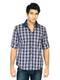
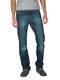
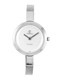
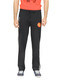
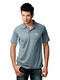
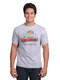
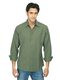
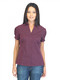
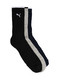
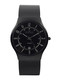

In [62]:
display(HTML(style + df_response_json.to_html(formatters=formatters, escape=False)))

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)